In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import pickle   #one type of file format
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns

In [167]:
df = pd.read_csv('addvertising.csv')

In [3]:
df.to_csv("addvertising.csv")

In [168]:
df.head(2)
#dependent variable = Sale
#unnecessary column = Unnamed: 0

,Unnamed: 0,Unnamed: 0.1,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4


In [12]:
df.shape

(200, 4)

In [171]:
df.drop('Unnamed: 0.1', axis =1, inplace=True)

In [172]:
df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [6]:
df.info()
#no nan values
#all coumns are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
#now details of numerical columns
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


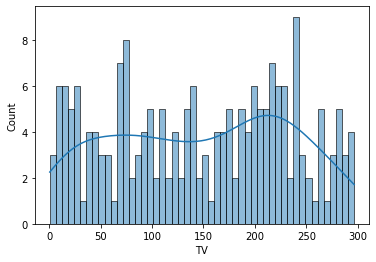

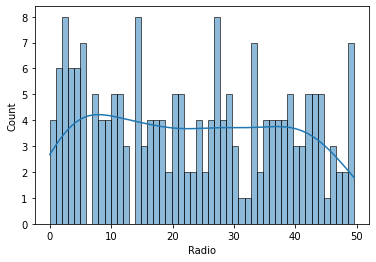

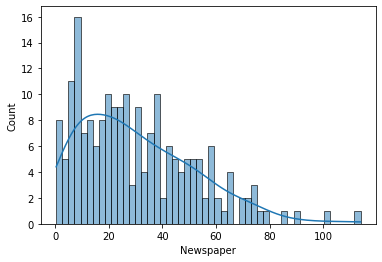

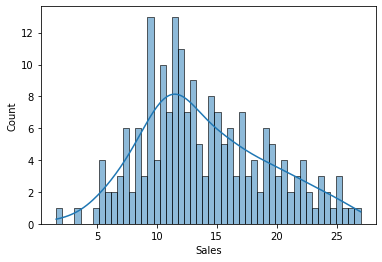

In [17]:
#now chexk the distribution of continous variables
for i in df.columns:
    sns.histplot(df[i], kde =True, bins=50)
    plt.show()
#newspaper is skewed
#check for possible outliers

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


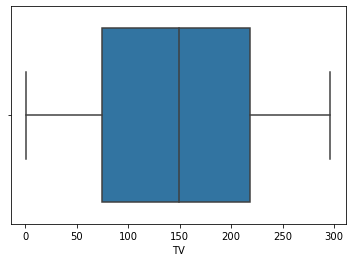

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


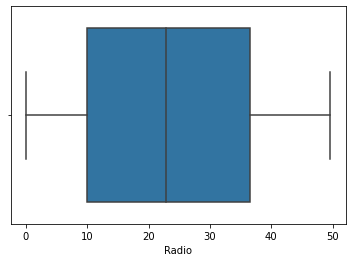

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


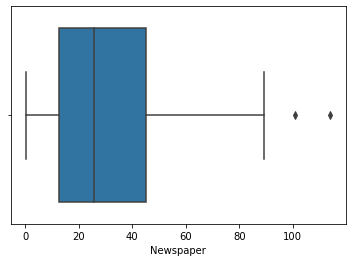

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


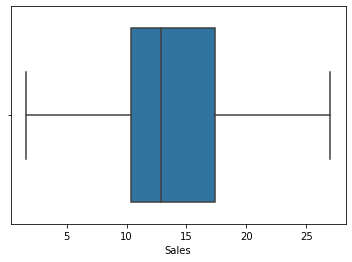

In [19]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()
#some outliers in newspaper

In [33]:
#check for correleation
print(df.corr(),"\n")

print(df.corr()['Sales'])
#see the corr of input freatures with output feature
#least corr has newspaper

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000 


TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64


<AxesSubplot:>

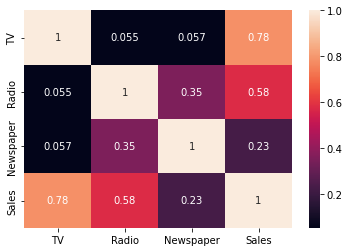

In [25]:
#see correlation by graph
sns.heatmap(df.corr(),annot=True)

#there is corr bw newspaper and radio 0.35 greater thhan newspapers corr with sale ie 0.23
#so we can say that there is a multicolinearity aoumn features(predictor)n/p&radio


In [45]:
#removing outliers
df.shape

(200, 4)

In [46]:
df1 = df.copy()
from scipy import stats
df1 = df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]

In [49]:
df1.shape

(198, 4)

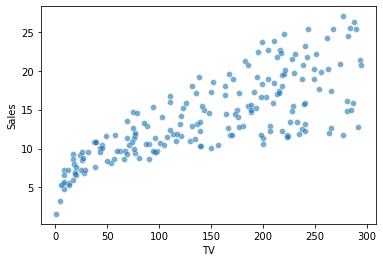

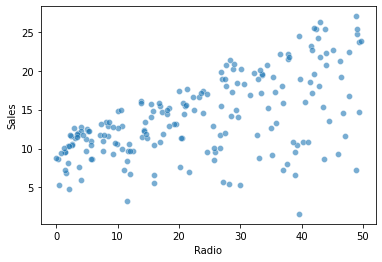

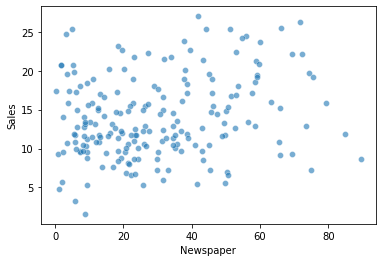

In [59]:
#now see the relationship of dependent variable with indepandent variables
#see theere is sdtron linear relation bw sale and nwpaper
for i in df1.columns[:-1]:
    sns.scatterplot(x = i, y= 'Sales', data=df1, alpha=0.6)
    plt.show()

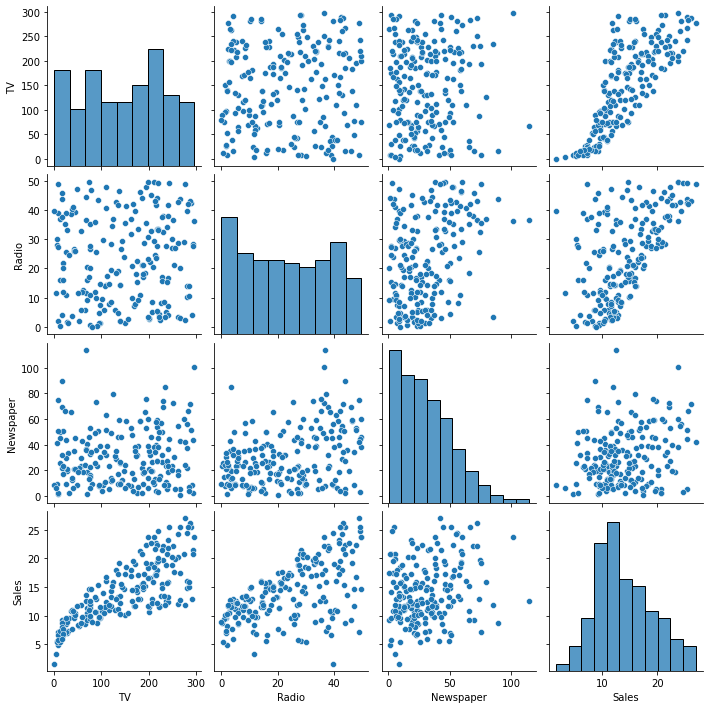

In [57]:
#Alternative
sns.pairplot(df)

In [75]:
#some ststistical analysis
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales~TV', data=df).fit()
lm1 = smf.ols(formula='Sales~Radio', data=df).fit()
lm2 = smf.ols(formula='Sales~Newspaper', data=df).fit()
lm3 = smf.ols(formula='Sales~TV+Radio+Newspaper', data=df).fit()
lm4 = smf.ols(formula='Sales~TV+Radio', data=df).fit()
print(lm.summary().tables[0])
print(lm1.summary().tables[0])
print(lm2.summary().tables[0])
print(lm3.summary().tables[0])
print(lm4.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 22 May 2022   Prob (F-statistic):           1.47e-42
Time:                        19:55:26   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squar

In [ ]:
conclusion
highly correlated predictor tv contribute 61% r2 to response
least corelated nppaper contribute least5%
if we took all the redictor to detmine response than R2 increases significatntly89.7%
but as we have seen there is multicolinarity bw npaper and radio so if we eleminate npaper than see R2 
almost same89.7%not shown any change but Fstats changes to 859 from 570 only

strong conclusion if we add more columns than R2 will increas means accuracy will increase for sure.
 

In [76]:
print(lm.summary().tables[1])
print(lm1.summary().tables[1])
print(lm2.summary().tables[1])
print(lm3.summary().tables[1])
print(lm4.summary().tables[1])
#4.02450242  2.7169982  -0.10567815

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
                 coef    std err          t      P>|

conclusions
when we add all predictors than we see that npaper tstats become neg and pvalue become very high 0.86 which means its not any more statistically significat or we can say not having any strong relation with output sale
while others have low p values 
we also see that the cofff od tv and radio hv less change while nppeper coff got changed ie -0.0010 means again not having ay sig relation relation with sales
this happeend bcz of radio vs npper correlation which get fade the effect of npperper wherne radio came in the picture

In [74]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales~TV', data=df).fit()
lm1 = smf.ols(formula='Sales~Radio', data=df).fit()
lm2 = smf.ols(formula='Sales~Newspaper', data=df).fit()
lm3 = smf.ols(formula='Sales~TV+Radio+Newspaper', data=df).fit()
print('tv',lm.rsquared)
print('radio',lm1.rsquared)
print('nppaper',lm2.rsquared)
print('all',lm3.rsquared)

tv 0.611875050850071
radio 0.33203245544529547
nppaper 0.05212044544430516
all 0.8972106381789522


In [68]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales~Radio+Newspaper', data=df).fit()
lm1 = smf.ols(formula='Sales~Radio', data=df).fit()
lm2 = smf.ols(formula='Sales~Newspaper', data=df).fit()
print(lm.summary().tables[0])
print(lm1.summary().tables[0])
print(lm2.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     49.11
Date:                Sun, 22 May 2022   Prob (F-statistic):           4.96e-18
Time:                        19:45:17   Log-Likelihood:                -573.24
No. Observations:                 200   AIC:                             1152.
Df Residuals:                     197   BIC:                             1162.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squar

In [69]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales~Radio+Newspaper', data=df).fit()
lm1 = smf.ols(formula='Sales~Radio', data=df).fit()
lm2 = smf.ols(formula='Sales~Newspaper', data=df).fit()
print(lm.summary().tables[1])
print(lm1.summary().tables[1])
print(lm2.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1889      0.628     14.640      0.000       7.951      10.427
Radio          0.1990      0.022      9.101      0.000       0.156       0.242
Newspaper      0.0066      0.015      0.446      0.656      -0.023       0.036
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.0

conclusion 
bcz therr wwas a corr bw radio and npaper 

In [78]:
#check is ther any Interaction Variables
lm1 = smf.ols(formula='Sales~TV+ Radio*TV', data=df).fit()
lm2 = smf.ols(formula='Sales~TV*Radio + Radio', data=df).fit()
lm3 = smf.ols(formula='Sales~TV+Radio', data=df).fit()


print(lm1.summary().tables[0])
print(lm2.summary().tables[0])
print(lm3.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sun, 22 May 2022   Prob (F-statistic):          6.68e-146
Time:                        20:26:09   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squar

In [79]:
print(lm2.summary().tables[1])
print(lm3.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204


In [240]:
lm1 = smf.ols(formula='Sales~Newspaper+ TV*Newspaper', data=df).fit()
#lm2 = smf.ols(formula='Sales~TV*Radio + Radio', data=df).fit()
lm3 = smf.ols(formula='Sales~TV+Newspaper', data=df).fit()
print(lm1.summary().tables[0])
print(lm3.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 22 May 2022   Prob (F-statistic):           2.84e-44
Time:                        23:55:40   Log-Likelihood:                -509.12
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squar

In [82]:
#variance INFLATION  factor VIF to check the multicolinearity
#if VIF is greater than 10 than its problematic otherwise not in this case there is multilinearity in 
#there is no multicolinearity amoung predictors
#multicolinerity is vcorrelation amoung predictors


lm3 = smf.ols(formula='Newspaper~TV+Radio', data=df).fit()
lm4 = smf.ols(formula='TV~Newspaper+Radio', data=df).fit()
lm5 = smf.ols(formula='Radio~Newspaper+TV', data=df).fit()
print(1/(1-lm3.rsquared))
print(1/(1-lm4.rsquared))
print(1/(1-lm5.rsquared))

1.1451873787239286
1.0046107849396502
1.1449519171055353


In [96]:
#lets check when i removed the outliers is there any improvement in stats
lm3 = smf.ols(formula='Sales~TV+Radio', data=df).fit()
lm2 = smf.ols(formula='Sales~TV+Radio', data=df1).fit()
print(lm3.rsquared)
print(lm2.rsquared)
print(lm2.summary().tables[1])
print(lm3.summary().tables[1])

#R2 get reduced bcz the data get lost and there were not much outliers anyways

0.8971942610828957
0.8953728420315047
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9315      0.297      9.861      0.000       2.345       3.518
TV             0.0457      0.001     32.385      0.000       0.043       0.048
Radio          0.1880      0.008     23.182      0.000       0.172       0.204
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204


<AxesSubplot:xlabel='Newspaper', ylabel='Count'>

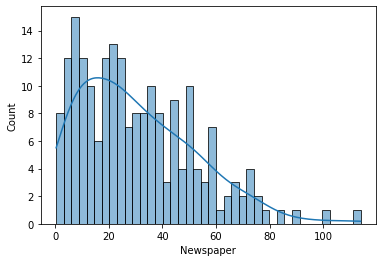

In [94]:
#nowsuppose i ll remove skiweness than see the performance
sns.histplot(df['Newspaper'],kde =True, bins=40)  #there is skwed and 

In [90]:
df2 = df.copy()

In [91]:
df2['Newspaper'] = np.log(df2['Newspaper'])

<AxesSubplot:xlabel='Newspaper', ylabel='Count'>

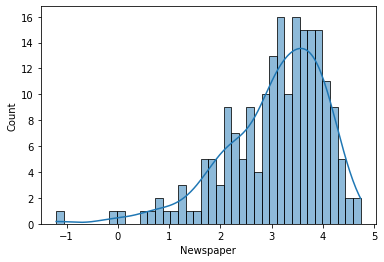

In [93]:
sns.histplot(df2['Newspaper'], kde =True, bins=40)

In [95]:
lm3 = smf.ols(formula='Sales~TV+Radio', data=df).fit()
lm2 = smf.ols(formula='Sales~TV+Radio', data=df2).fit()
print(lm3.rsquared)
print(lm2.rsquared)

#no change in R2

0.8971942610828957
0.8971942610828957


In [97]:
#now we model our system


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

In [98]:
#1step 
#now creat x,y in which u ll establish relation
y = df['Sales']
x = df.drop(columns = ["Sales"])

In [104]:
#step2 
#normalisation
scaler = StandardScaler()
arr = scaler.fit_transform(x)   #it will put all predictors in same scale by making std =1 for all

In [124]:
print(arr[0:5])  #[tv,radio,npaper]
print(len(arr))
print(arr.shape)
print(arr.shape[0])

[[ 0.96985227  0.98152247  1.77894547]
 [-1.19737623  1.08280781  0.66957876]
 [-1.51615499  1.52846331  1.78354865]
 [ 0.05204968  1.21785493  1.28640506]
 [ 0.3941822  -0.84161366  1.28180188]]
200
(200, 3)
200


In [114]:
dx = pd.DataFrame(arr)
dx.head()

,0,1,2
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


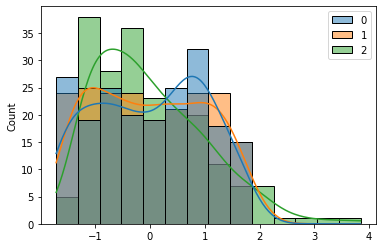

In [118]:
sns.histplot(dx, kde = True)
plt.show()

In [117]:
dx.describe()

,0,1,2
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.104672e-16,-4.413137e-16,2.220446e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.708823e+00,-1.570868e+00,-1.392646e+00
25%,-8.485295e-01,-8.973206e-01,-8.195504e-01
50%,3.161515e-02,-2.457858e-02,-2.211368e-01
75%,8.381955e-01,8.954299e-01,6.695788e-01
max,1.744029e+00,1.778300e+00,3.841171e+00


In [138]:
#alternate way to check the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =[variance_inflation_factor(arr,i) for i in range(arr.shape[1])]
vif

[1.00461078493965, 1.1449519171055353, 1.1451873787239288]

In [155]:
dfx = pd.DataFrame(vif)
dfx.columns =  ['VIF']
dfx['predictors'] = x.columns
dfx

,VIF,predictors
0,1.004611,TV
1,1.144952,Radio
2,1.145187,Newspaper


In [146]:
#vif is below 5 so no problem related to multicolinearity

In [163]:
#step
#train test split
x_train,x_test,y_train,y_test = train_test_split(arr, y,test_size=0.2, random_state=45)
#now build a model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [164]:
#storing the model
pickle.dump(lr,open('advirtizing_model.pickle','wb'))

In [188]:
#parameters of model
print("coff is :",lr.coef_)
print("interct is :",lr.intercept_)
print('score: ',lr.score(x_train,y_train))

coff is : [ 4.02450242  2.7169982  -0.10567815]
interct is : 14.015115905033015
score:  0.895947647524022


In [178]:
#next step 
#prediction
transform_data = scaler.transform([[230.1,37.8,69.2]])
#print(transform_data)
lr.predict(transform_data)

array([20.39708782])

In [179]:
df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [190]:
#now test your model on test data
predict = lr.predict(x_test)

<AxesSubplot:ylabel='Sales'>

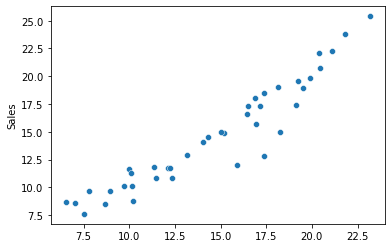

In [192]:
#plot shows there is some relation bw train and test
sns.scatterplot(x = predict, y= y_test)

<AxesSubplot:xlabel='Sales', ylabel='Sales'>

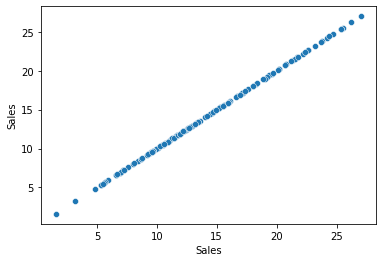

In [193]:
sns.scatterplot(x=y_train, y = y_train)

In [196]:
print('scoretrain: ',lr.score(x_train,y_train))
print('scoretest : ',lr.score(x_test,y_test))


scoretrain:  0.895947647524022
scoretest :  0.8955882331233613


In [198]:
#i ll make a model using interaction bw radio aand tv and than i ll check the accuracy
df4 = df.copy()

In [199]:
df4.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [200]:
df4['TV_radio']= df4.TV* df4.Radio

In [206]:
df4.drop('Newspaper', axis=1, inplace=True)
df4.head(3)

,TV,Radio,Sales,TV_radio
0,230.1,37.8,22.1,8697.78
1,44.5,39.3,10.4,1748.85
2,17.2,45.9,9.3,789.48


In [203]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle


In [208]:
X = df4.drop('Sales',axis=1)
Y = df4['Sales']

In [210]:
scaler = StandardScaler()
ar = scaler.fit_transform(X)

In [214]:
#CHECK MULTICOLINEARITY
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =[variance_inflation_factor(ar,i) for i in range(ar.shape[1])]
vif

[3.7278483523630745, 3.9076511975969574, 6.9378599723586865]

In [211]:
X_train,X_test,Y_train,Y_test = train_test_split(ar,Y,test_size=0.20,random_state=345)

In [216]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [217]:
pickle.dump(lr,open('advertizinf_with_interaction_model','wb'))

In [221]:
#prediction
transform_data = scaler.transform([[230.1,37.8,8697.78]])
#print(transform_data)
lr.predict(transform_data)

array([21.63703327])

In [220]:
df4.head()

,TV,Radio,Sales,TV_radio
0,230.1,37.8,22.1,8697.78
1,44.5,39.3,10.4,1748.85
2,17.2,45.9,9.3,789.48
3,151.5,41.3,18.5,6256.95
4,180.8,10.8,12.9,1952.64


In [222]:
predct = lr.predict(X_test)

<AxesSubplot:ylabel='Sales'>

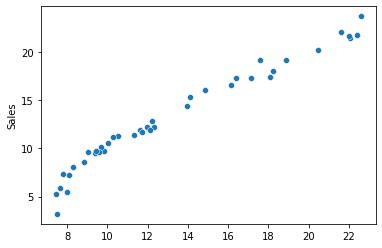

In [223]:
sns.scatterplot(x = predct,y = Y_test)

In [224]:
print('scoretrain: ',lr.score(X_train,Y_train))
print('scoretest : ',lr.score(X_test,Y_test))

scoretrain:  0.9691408817547292
scoretest :  0.958532247670431


In [226]:
#let open omdel previous model without interaction
model = pickle.load(open('advirtizing_model.pickle','rb'))

In [231]:
pre = model.predict(x_test)

<AxesSubplot:ylabel='Sales'>

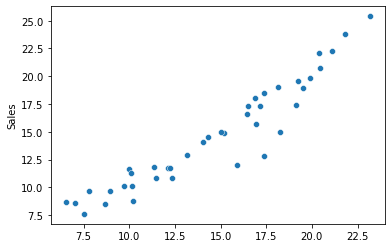

In [233]:
sns.scatterplot(x = pre,y = y_test)

In [234]:
#model without interaction
print('scoretrain: ',model.score(x_train,y_train))
print('scoretest : ',model.score(x_test,y_test))

scoretrain:  0.895947647524022
scoretest :  0.8955882331233613


In [235]:
#model with interaction
print('scoretrain: ',lr.score(X_train,Y_train))
print('scoretest : ',lr.score(X_test,Y_test))

scoretrain:  0.9691408817547292
scoretest :  0.958532247670431


In [236]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
